In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [86]:
np.random.seed(10)

In [237]:
class KMeans:
    def __init__(self, n_clusters, tune=False):
        self.tune = tune
        self.n_clusters = n_clusters
        self.n_rows, self.n_features = None, None
        self.max_iterations = 100000
        self._inertia = 0  # SSE
        self.metrics = {
            'L1': lambda x, y: np.sum(np.absolute(x - y), axis=1),
            'L2': lambda x, y: np.sum(np.sqrt((x - y) ** 2), axis=1)
        }

    def init_centroids(self, X):
        self.n_rows, self.n_features = df.shape
        centroids = np.zeros((self.n_clusters, self.n_features))
        for k in range(self.n_clusters):  # iterations of
            centroid = X[np.random.choice(range(self.n_rows))]  # random centroids
            centroids[k] = centroid
        return centroids  # return random centroids

    def create_clusters(self, X, centroids, metric):
        clusters = [[] for _ in range(self.n_clusters)]
        self._inertia = 0
        for point_idx, point in enumerate(X):
            running_metric = self.metrics[metric](point, centroids)
            closest_centroid = np.argmin(running_metric)
            clusters[closest_centroid].append(point_idx)

        # calculate inertia
        if self.tune:
            for i, cluster in enumerate(clusters):
                points = X[cluster]
                self._inertia += np.sum(self.metrics[metric](points, centroids[i]))
        return clusters

    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.n_clusters, self.n_features))
        # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0)  # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids

    def fit(self, df, metric='L2'):
        X = df.values
        centroids = self.init_centroids(X)
        for _ in range(self.max_iterations):
                clusters = self.create_clusters(X, centroids, metric)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)  # calculate new centroids
            diff = centroids - previous_centroids  # calculate difference
            if not diff.any():
                break
        return clusters, centroids


def elbow(n_clusters, df):
    SSE = []
    for i in range(n_clusters):
        kmeans = KMeans(n_clusters=i + 1, tune=True)
        kmeans.fit(df)
        SSE.append(kmeans._inertia)
    frame = pd.DataFrame({'Cluster': range(1, n_clusters + 1), 'SSE': SSE})
    plt.figure(figsize=(12, 6))
    plt.plot(frame['Cluster'], frame['SSE'], marker="*")
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [238]:
df = pd.read_csv('../data/Wholesale customers data.csv')
columns = list(df.columns)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [239]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.

C:\Anaconda\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning:

invalid value encountered in true_divide



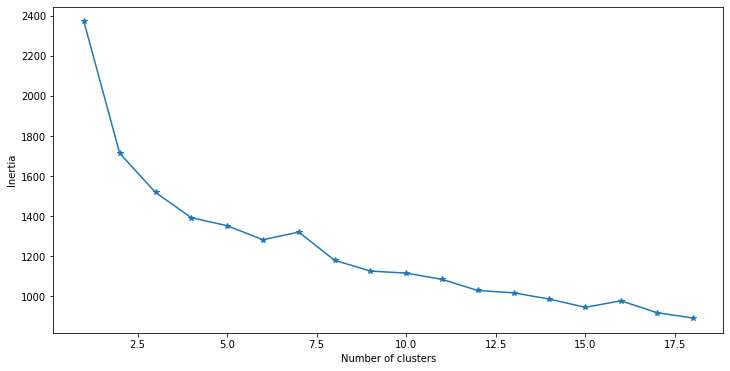

In [235]:
#elbow(20, df_scaled)
#kmeans = KMeans(n_clusters=2)

In [249]:
kmeans = KMeans(n_clusters=3)
clusters, centroids = kmeans.fit(df_scaled)

In [250]:
clusters

[[0,
  1,
  2,
  7,
  9,
  10,
  12,
  13,
  14,
  16,
  23,
  24,
  28,
  35,
  37,
  38,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  53,
  56,
  57,
  60,
  61,
  63,
  65,
  67,
  74,
  77,
  81,
  82,
  85,
  86,
  92,
  94,
  96,
  100,
  101,
  102,
  106,
  107,
  108,
  109,
  111,
  123,
  127,
  145,
  155,
  156,
  158,
  159,
  160,
  163,
  164,
  165,
  166,
  170,
  171,
  173,
  175,
  188,
  189,
  193,
  197,
  200,
  201,
  205,
  209,
  211,
  214,
  216,
  218,
  245,
  251,
  264,
  266,
  268,
  279,
  293,
  297,
  298,
  300,
  301,
  302,
  303,
  304,
  305,
  306,
  309,
  312,
  315,
  319,
  331,
  333,
  335,
  340,
  341,
  343,
  346,
  347,
  349,
  351,
  353,
  357,
  365,
  376,
  396,
  407,
  415,
  416,
  418,
  437],
 [196,
  198,
  199,
  202,
  203,
  204,
  206,
  207,
  208,
  210,
  212,
  213,
  215,
  217,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  

In [251]:
centroids

array([[ 1.44865163,  0.09335859, -0.35319716,  0.84858429,  1.09849463,
        -0.33138046,  1.14621304,  0.106097  ],
       [-0.57277243, -1.59749436,  0.00650393, -0.34331365, -0.39958256,
         0.05441803, -0.42008232, -0.14571087],
       [-0.50590496,  0.57952169,  0.17556987, -0.29328802, -0.39724939,
         0.14577359, -0.41327343,  0.00364802]])

In [252]:
from sklearn.manifold import TSNE
import plotly.express as px

In [253]:
df_scaled.iloc[-2:]

,0,1,2,3,4,5,6,7
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046
439,-0.690297,0.590668,-0.729307,-0.555924,-0.573227,-0.620094,-0.504888,-0.522869


In [254]:
def compress(df, centroids):
    tsne = TSNE(n_components=2)
    concat_df = pd.concat([df, pd.DataFrame(centroids)])
    tnse_df = tsne.fit_transform(concat_df)

    return pd.DataFrame(tnse_df[:-len(centroids)]), pd.DataFrame(tnse_df[-len(centroids):])

In [255]:
tnse_df, tnse_centroids = compress(df_scaled, centroids)

C:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [256]:
tnse_centroids = pd.DataFrame(tnse_centroids)
tnse_df = pd.DataFrame(tnse_df)

In [257]:
#plt.scatter(x=tnse_centroids[0], y=tnse_centroids[1],s=100, color=['red','blue'])
# plt.scatter(x=tnse_df[0], y=tnse_df[1])
# plt.show()
fig = px.scatter(tnse_df, x=0, y=1)
fig.add_scatter(x=tnse_centroids[0], y=tnse_centroids[1])
fig.show()